In [14]:
from trbox.trader import Trader
from trbox.strategy import Strategy
from trbox.market.onrequest.localcsv import YahooOHLCV
from trbox.event.market import Candlestick, OhlcvWindow
from trbox.trader.dashboard import Dashboard
from trbox.common.logger import Log
from trbox.common.logger.parser import Memo
from trbox.broker.paper import PaperEX


In [15]:
SYMBOL = 'BTC'
QUANTITY = 0.2
DELAY = 0
START = '2021-01-01'
END = None
LENGTH = 200

In [16]:
# on_tick
def dummy_action(self: Strategy, e: Candlestick):
    self.trader.trade(SYMBOL, QUANTITY)


In [17]:
t = Trader(
    strategy=Strategy(
        on_window=dummy_action),
    market=YahooOHLCV(
        source={SYMBOL: f'_data_/{SYMBOL}_bar1day.csv'},
        start=START,
        end=END,
        length=LENGTH),
    broker=PaperEX(SYMBOL)
)


In [18]:

t.run()


[ 2023-02-02 22:31:18.700 | WARNING ] TradingBook : trading book not ready price=None bid=None ask=None #trading #book [ engine - engine.py:38 - match_rules() #warning ]


<AxesSubplot: >

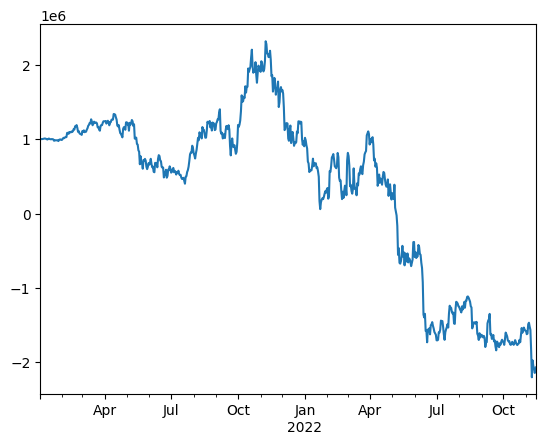

In [19]:
t.dashboard.navs.plot()